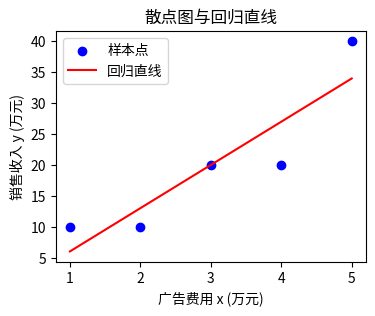

(2) 相关系数 r = 0.9037, p = 0.0354
(3) 回归方程: y = -1.0000 + 7.0000 x
(4) 回归标准误差 6.0553
(5) 截距 beta_0 的95% 区间:[-21.21124854  19.21124854]
(5) 斜率 beta_1 的95% 区间:[ 0.90607928 13.09392072]
(6) 决定系数 R^2 = 0.8167


In [15]:
# 2-14
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import font_manager as fm
import statsmodels.api as sm
import statsmodels.formula.api as smf
from scipy import stats

# 数据
x = np.array([1, 2, 3, 4, 5])
y = np.array([10, 10, 20, 20, 40])

# 添加常数项（截距项）
X = sm.add_constant(x)

# # 拟合回归模型
model = sm.OLS(y, X).fit()

# 散点图
my_font = fm.FontProperties(fname="/usr/share/fonts/opentype/noto/NotoSansCJK-Regular.ttc")
plt.rcParams['font.family'] = my_font.get_name()
plt.rcParams['axes.unicode_minus'] = False
plt.figure(figsize=(4, 3))
plt.scatter(x, y, color="blue", label="样本点")
plt.plot(x, model.predict(X), color="red", label="回归直线")
plt.xlabel("广告费用 x (万元)")
plt.ylabel("销售收入 y (万元)")
plt.legend()
plt.title("散点图与回归直线")
plt.show()

# 相关系数检验
r, p_value = stats.pearsonr(x, y)
print("(2) 相关系数 r = %.4f, p = %.4f" % (r, p_value))

# 最小二乘法回归方程
print("(3) 回归方程: y = %.4f + %.4f x" % (model.params[0], model.params[1]))

# 回归标准误差
sigma = np.sqrt(model.mse_resid)
print("(4) 回归标准误差 %.4f" % sigma)

# 参数估计的95%置信区间
conf_int = model.conf_int(alpha=0.05)
print(f"(5) 截距 beta_0 的95% 区间:{conf_int[0]}")
print(f"(5) 斜率 beta_1 的95% 区间:{conf_int[1]}")

# 决定系数 R^2
print("(6) 决定系数 R^2 = %.4f" % model.rsquared)



In [11]:
import statsmodels.api as sm

# 构造 DataFrame
df = pd.DataFrame({"x": [1,2,3,4,5],
                   "y": [10,10,20,20,40]})

# 用公式接口拟合
model_fml = smf.ols("y ~ x", data=df).fit()

# 方差分析
anova_table = sm.stats.anova_lm(model_fml, typ=2)
print("(7) 方差分析表:")
print(anova_table)


(7) 方差分析表:
          sum_sq   df          F    PR(>F)
x          490.0  1.0  13.363636  0.035353
Residual   110.0  3.0        NaN       NaN


(8) 斜率显著性检验: t=3.6556, p=0.0354
(9) 相关系数显著性检验: t=3.6556, p=0.0354


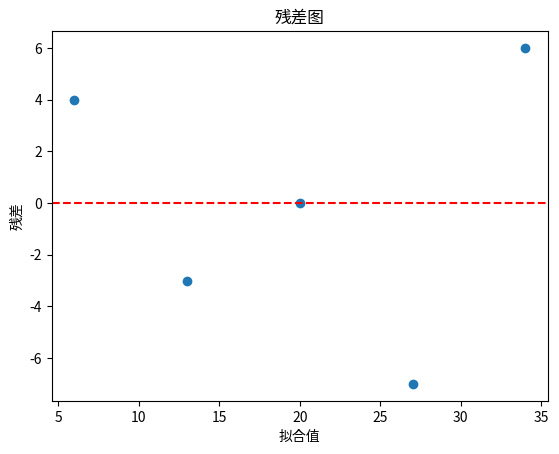

(11) 当广告费用=4.2时预测结果:
预测销售收入 = 28.4000
95%置信区间 = (17.0975, 39.7025)


In [12]:

# 回归系数 β1 显著性检验
print("(8) 斜率显著性检验: t=%.4f, p=%.4f" % (model.tvalues[1], model.pvalues[1]))

# 相关系数显著性检验
t_r = r * np.sqrt(len(x) - 2) / np.sqrt(1 - r**2)
p_r = 2 * (1 - stats.t.cdf(abs(t_r), df=len(x) - 2))
print("(9) 相关系数显著性检验: t=%.4f, p=%.4f" % (t_r, p_r))

# 残差图
residuals = model.resid
plt.scatter(model.fittedvalues, residuals)
plt.axhline(0, color="red", linestyle="--")
plt.xlabel("拟合值")
plt.ylabel("残差")
plt.title("残差图")
plt.show()

# 预测与95%置信区间
x_new = np.array([[1, 4.2]])   # 第一列是常数1，第二列是自变量
pred = model.get_prediction(x_new)
pred_summary = pred.summary_frame(alpha=0.05)

print("(11) 当广告费用=4.2时预测结果:")
print("预测销售收入 = %.4f" % pred_summary["mean"][0])
print(
    "95%%置信区间 = (%.4f, %.4f)"
    % (pred_summary["mean_ci_lower"][0], pred_summary["mean_ci_upper"][0])
)